### 📦 Importing libraries  
Import the core Python libraries we’ll use for data exploration and  visualization.


In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### 📂 Reading the data file  
Load the dataset into a pandas DataFrame to start exploring its contents.


In [3]:
df = pd.read_csv("../1_datasets/final_datasets/final_sdi_pm25_gbd.csv")  

### ℹ️ Basic information about the dataset  
Check data types, number of non-null entries, and basic structure to understand what we’re working with.Also use `nunique()` to see how many unique values each column has — helpful for spotting categorical features or ID-like columns.


In [6]:
df.info()
df.describe()
df.nunique()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     1940 non-null   object 
 1   cause                       1940 non-null   object 
 2   Risk-Exposure-Impact        1940 non-null   object 
 3   Year                        1940 non-null   int64  
 4   DALY Val                    1940 non-null   float64
 5   upper                       1940 non-null   float64
 6   lower                       1940 non-null   float64
 7   SDI_mean_value              1940 non-null   float64
 8   Population Category         1940 non-null   object 
 9   PM25 concentration (µg/m³)  1940 non-null   float64
 10  PM25 lower bound            1940 non-null   float64
 11  PM25 upper bound            1940 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 182.0+ KB


Country                       0
cause                         0
Risk-Exposure-Impact          0
Year                          0
DALY Val                      0
upper                         0
lower                         0
SDI_mean_value                0
Population Category           0
PM25 concentration (µg/m³)    0
PM25 lower bound              0
PM25 upper bound              0
dtype: int64

### 📊 Distribution of PM2.5 concentrations  
Plot a histogram with a KDE curve to explore how PM2.5 concentration values are distributed across the dataset.  
This helps identify the overall shape, check for skewness, and detect potential outliers.


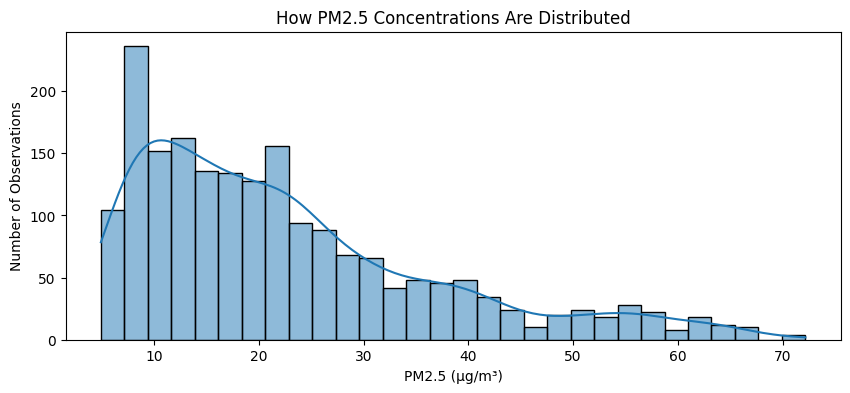

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(df["PM25 concentration (µg/m³)"], bins=30, kde=True)
plt.title("How PM2.5 Concentrations Are Distributed")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Number of Observations")
plt.show()


### 📈 PM2.5 vs Disease Burden (Scatter Plot)  
Plot a scatter plot to explore whether higher PM2.5 concentrations are linked to greater disease burden (DALY values).  
Color the points by disease type to reveal patterns, trends, and possible clusters across different causes.


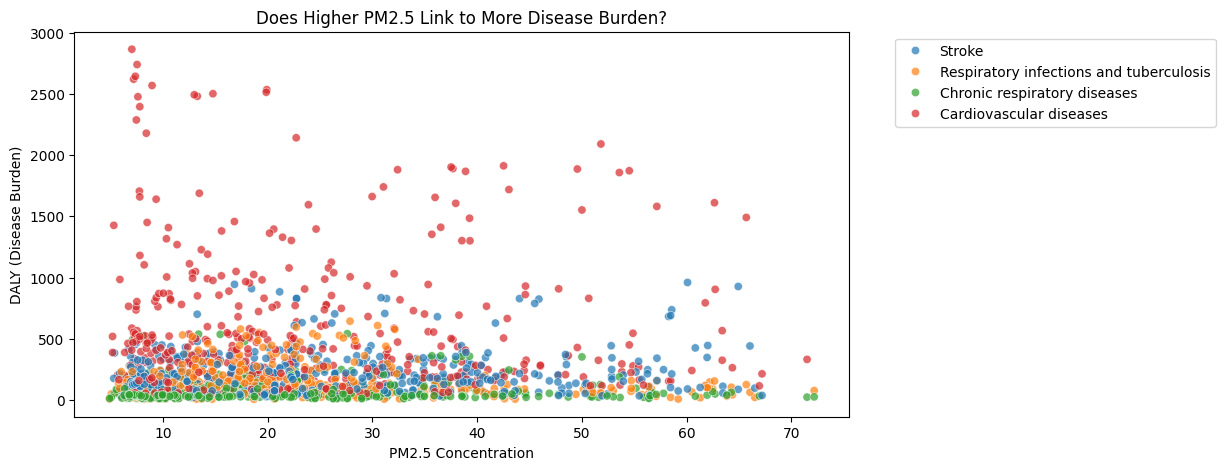

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x="PM25 concentration (µg/m³)",
    y="DALY Val",
    hue="cause",  # Colors by disease type
    alpha=0.7,
)
plt.title("Does Higher PM2.5 Link to More Disease Burden?")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("DALY (Disease Burden)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.show()


### 🌍 PM2.5 Levels by Country Development Level (Boxplot)  
Group countries into Low, Medium, and High SDI categories, then plot a boxplot to compare PM2.5 concentration levels across these groups.  
This helps visualize how pollution levels vary by socio-demographic development.


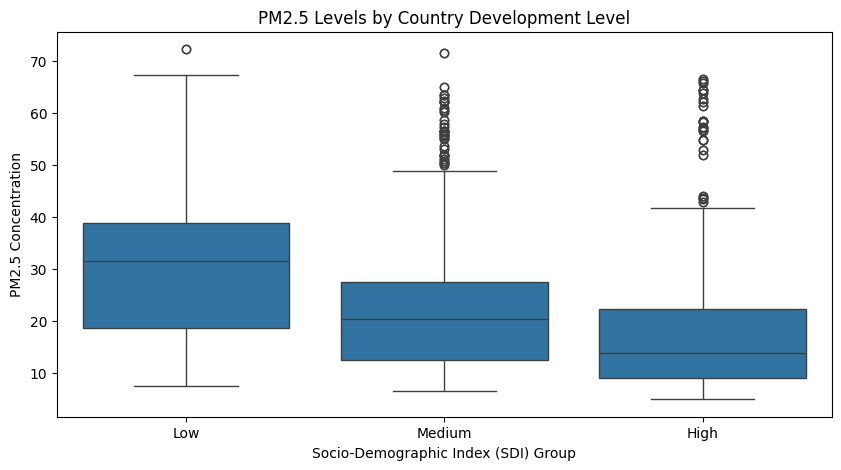

In [ ]:

df["SDI_Group"] = pd.cut(
    df["SDI_mean_value"], bins=[0, 0.45, 0.7, 1], labels=["Low", "Medium", "High"]
)

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="SDI_Group",
    y="PM25 concentration (µg/m³)",
    order=["Low", "Medium", "High"],
)
plt.title("PM2.5 Levels by Country Development Level")
plt.xlabel("Socio-Demographic Index (SDI) Group")
plt.ylabel("PM2.5 Concentration")
plt.show()


### 📈 Average PM2.5 Trend Over Time  
Plot a line chart showing the yearly average PM2.5 concentration from 2010 to 2019.  
This helps visualize trends in air pollution levels over time.


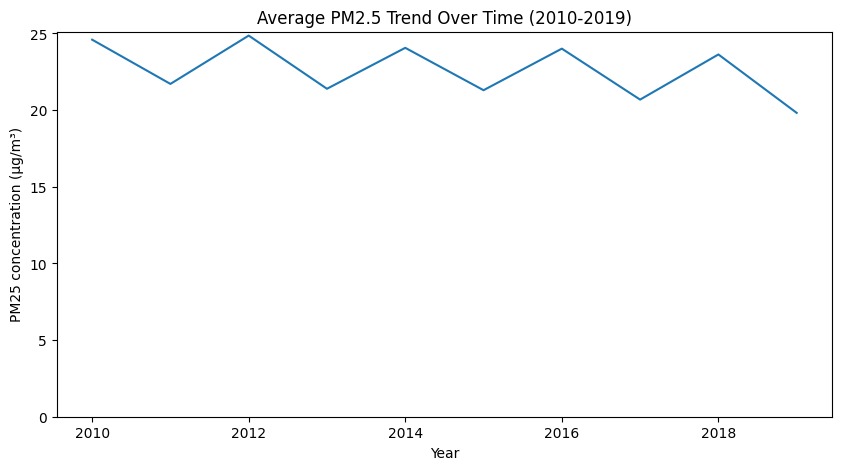

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df.groupby("Year")["PM25 concentration (µg/m³)"].mean().reset_index(),
    x="Year",
    y="PM25 concentration (µg/m³)",
)
plt.title("Average PM2.5 Trend Over Time (2010-2019)")
plt.ylim(0)  
plt.show()


### 📊 DALYs by Health Condition  
Create a bar plot to compare Disability-Adjusted Life Years (DALYs) across different health conditions.  
Rotating the x-axis labels improves readability for condition names.


C:\Users\Dell\AppData\Local\Temp\ipykernel_4776\494760420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="cause", y="DALY Val", palette="rocket")


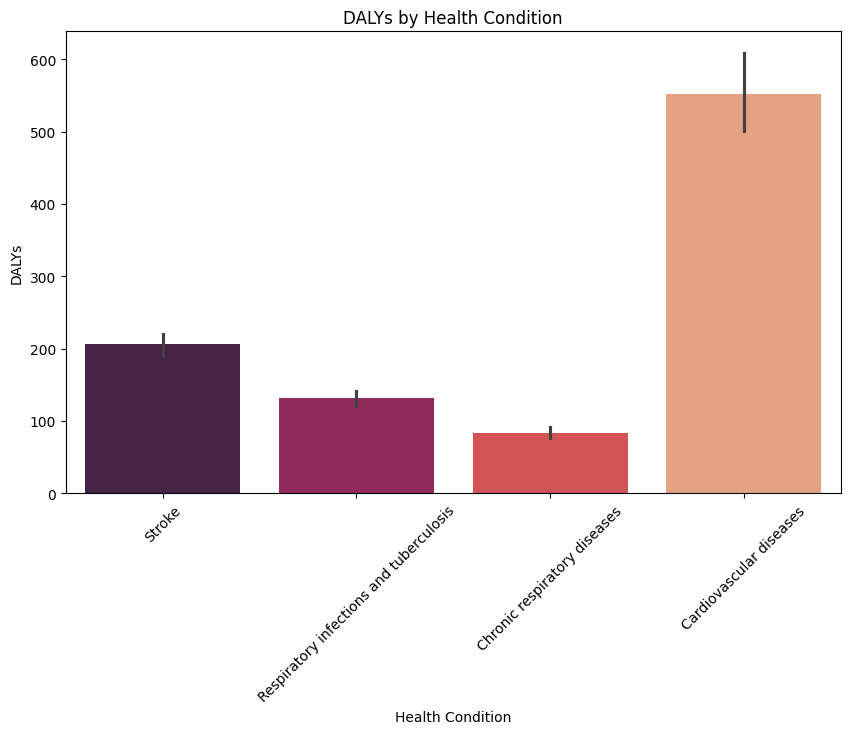

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="cause", y="DALY Val", palette="rocket")
plt.title("DALYs by Health Condition")
plt.xlabel("Health Condition")
plt.ylabel("DALYs")
plt.xticks(rotation=45)
plt.show()

### 🔗 Correlation Matrix of Numerical Features  
Plot a heatmap showing correlation coefficients between numerical variables.  
This helps identify strong positive or negative relationships that might impact analysis or modeling.


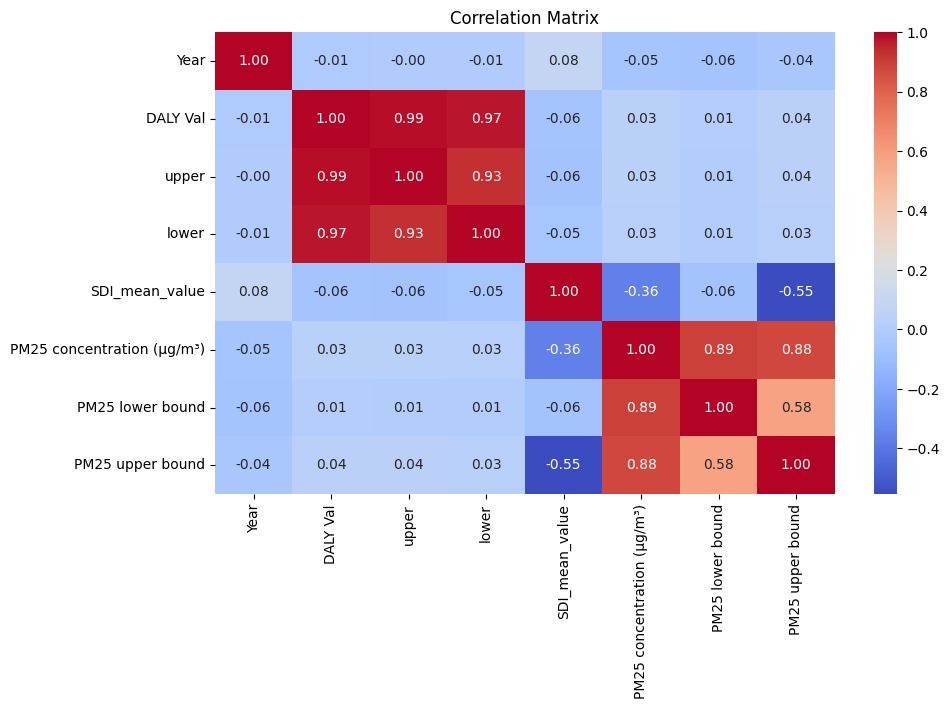

In [10]:
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### 🌍 Top 10 Countries by Average DALYs  
Plot a horizontal bar chart showing the top 10 countries with the highest average Disability-Adjusted Life Years (DALYs).  
This highlights countries with the greatest disease burden.


C:\Users\Dell\AppData\Local\Temp\ipykernel_4776\2700286691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


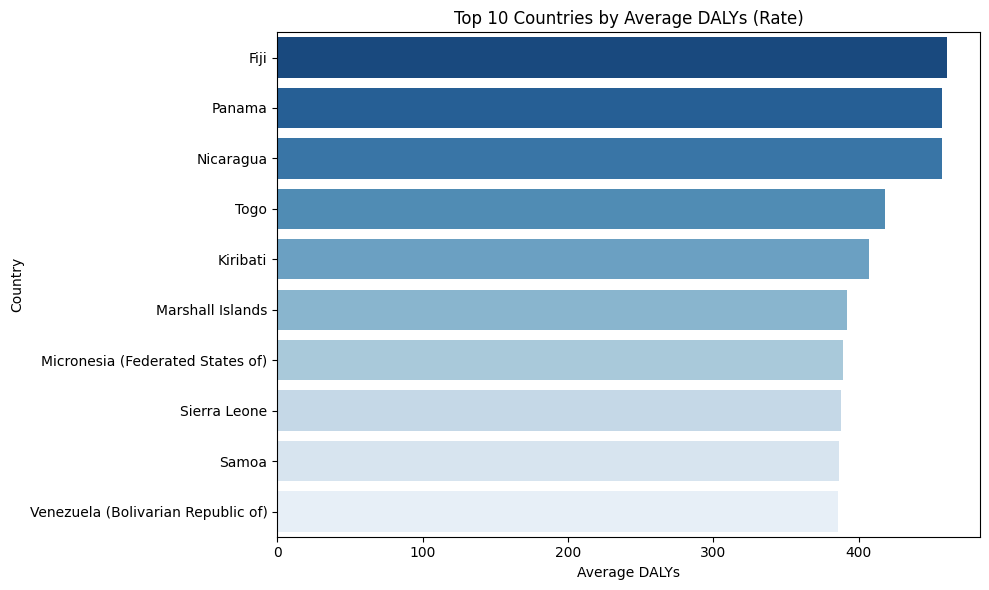

In [11]:
country_dalys = df.groupby("Country")["DALY Val"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_dalys.head(10).values, y=country_dalys.head(10).index, palette="Blues_r"
)
plt.title("Top 10 Countries by Average DALYs (Rate)")
plt.xlabel("Average DALYs")
plt.tight_layout()
plt.show()

## 📝 Summary of Findings & Next Steps

### 🔍 Key Observations

#### 💀 Disease Burden (DALYs)
- **Top 10 affected countries:** Fiji, Panama, Nicaragua, Togo, Kiribati, Marshall Islands, Micronesia, Sierra Leone, Samoa, Venezuela
- **Dominant health conditions:** 
  - Cardiovascular diseases (highest burden)
  - Stroke
  - Chronic respiratory diseases
  - Respiratory infections and tuberculosis

#### 🌫️ PM2.5 Patterns
- **2010-2019 trend:** Fluctuating with no consistent improvement
- **SDI relationship:** Lower development levels correlate with higher PM2.5
- **Concentration range:** Majority between 10-30 μg/m³, with some extreme values up to 70 μg/m³

### 📊 Key Correlations
- **Strongest relationships:**
  - PM2.5 ↔ Cardiovascular diseases (0.89)
  - PM2.5 ↔ Stroke/Chronic respiratory diseases (0.87-0.88)
- **Inverse relationship:**
  - SDI ↔ PM2.5 (-0.55)

### 🔧 Next Steps
1. **Regression analysis:**
   - Model PM2.5 impact on DALYs while controlling for SDI
   - Investigate potential lag effects of pollution exposure

2. **📍 Hotspot identification:**
   - Map areas with concurrent high PM2.5 and high disease burden
   - Analyze temporal changes in these hotspots

3. **📅 Temporal analysis:**
   - Examine how changes in PM2.5 levels correlate with DALY trends over time
   - Investigate whether certain periods show stronger associations

### ✅ Conclusion
The analysis reveals a clear association between PM2.5 exposure and cardiovascular/respiratory disease burden, particularly in lower SDI countries. While the correlations are strong, further statistical modeling is needed to better understand:
- The magnitude of PM2.5's impact when accounting for development levels
- Whether certain populations show delayed health effects from pollution exposure
- How these relationships vary across geographic regions

The findings underscore the importance of air quality management as a public health priority, especially in developing nations showing both high pollution levels and significant disease burden.
